In [125]:
import os
import numpy as np
import glob
import pandas as pd  
#from keras import utils as np_utils
import random
import math as mp
import pickle
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
 
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.utils import to_categorical


%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [156]:
DATA_DIR = '/content/drive/MyDrive/Courses Aalto/AI in health tech/Project/Dataset'
CATEGORIES = ['F','S']

In [ ]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATA_DIR,category)
    class_num = CATEGORIES.index(category)
    test = "Fuck"
    for file in os.listdir(path):
      #sample_list = []
      label_list = []
      df = np.loadtxt(os.path.join(path,file), delimiter=",")
      #sample_list.append(np.array(df))
      training_data.append([df,class_num])
      #print(file)
      #print('Single Array:', df)
      #print('Kummulierte Liste', sample_list)
      #print('Index:', class_num)
      #print('training_data', training_data)
      #print('---------------------')
      


create_training_data()
random.shuffle(training_data)       


In [ ]:
training_data

In [14]:
#Create X and Y
X = []
Y = []
for features, label in training_data:
  X.append(features)
  Y.append(label)


In [15]:
print(len(X[198]))
Y[198]

4097


1

In [16]:
X = np.array(X).reshape(-1, 4097, 1)
Y = np.array(Y)

In [17]:
X.shape

(200, 4097, 1)

In [18]:
#Save X and Y for later use
pickle_out = open(DATA_DIR + "/X.pickle", "wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open(DATA_DIR + "/Y.pickle", "wb")
pickle.dump(Y,pickle_out)
pickle_out.close()

In [157]:
#Load X and Y from GD
pickle_in = open(DATA_DIR + "/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open(DATA_DIR + "/Y.pickle","rb")
Y = pickle.load(pickle_in)

In [158]:
# normalisation of seizure signals and shaping into the right format
X = tf.keras.utils.normalize(X, axis=1)
Y = to_categorical(Y)

In [9]:
def plot_eeg_signal(sig,lab,cnt):
    flag=True
    
    i=0
    for X,y in zip(sig,lab):
        if i<cnt and y==0:
            plt.figure(i,figsize=(30,5))
            plt.plot(X,'b')
            plt.title('Non Seizure EEG Signal')
            i=i+1
        if i==cnt:
            break
   
    j=i
    i=0
    for X,y in zip(sig,lab):
        if i<cnt and y==1:
            plt.figure(i+j,figsize=(30,5))
            plt.plot(X,'r')
            plt.title('Seizure EEG Signal')
            i=i+1
        if i==cnt:
            break
    

In [ ]:
plot_eeg_signal(X,Y,5)

In [ ]:
y_train.shape
y_train

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [160]:
print(X_train.shape[1], X_train.shape[2], y_train.shape[1])

4097 1 2


In [152]:



verbose, epochs, batch_size = 1, 25, 64
n_timesteps, n_features, n_outputs =X_train.shape[1], X_train.shape[2], y_train.shape[1]

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
#cnn = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(X_test,y_test))

cnn=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test,y_test))
#model=cnn.fit(X_train, y_train, batch_size=3, epochs=100, verbose=verbose)

Epoch 1/25
3/3 [==============================] - 1s 123ms/step - loss: 0.6933 - accuracy: 0.4805 - val_loss: 0.7142 - val_accuracy: 0.4500
Epoch 2/25
3/3 [==============================] - 0s 51ms/step - loss: 0.6896 - accuracy: 0.5023 - val_loss: 0.6876 - val_accuracy: 0.4500
Epoch 3/25
3/3 [==============================] - 0s 48ms/step - loss: 0.6384 - accuracy: 0.7191 - val_loss: 0.6628 - val_accuracy: 0.7250
Epoch 4/25
3/3 [==============================] - 0s 42ms/step - loss: 0.5770 - accuracy: 0.8668 - val_loss: 0.6231 - val_accuracy: 0.6000
Epoch 5/25
3/3 [==============================] - 0s 47ms/step - loss: 0.5007 - accuracy: 0.8180 - val_loss: 0.6255 - val_accuracy: 0.6750
Epoch 6/25
3/3 [==============================] - 0s 40ms/step - loss: 0.4007 - accuracy: 0.8844 - val_loss: 0.5528 - val_accuracy: 0.7500
Epoch 7/25
3/3 [==============================] - 0s 42ms/step - loss: 0.3039 - accuracy: 0.9496 - val_loss: 0.5072 - val_accuracy: 0.7750
Epoch 8/25
3/3 [==========

In [90]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_90 (Conv1D)           (None, 4095, 64)          256       
_________________________________________________________________
conv1d_91 (Conv1D)           (None, 4093, 64)          12352     
_________________________________________________________________
dropout_27 (Dropout)         (None, 4093, 64)          0         
_________________________________________________________________
max_pooling1d_62 (MaxPooling (None, 2046, 64)          0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 130944)            0         
_________________________________________________________________
dense_75 (Dense)             (None, 100)               13094500  
_________________________________________________________________
dense_76 (Dense)             (None, 1)               

In [94]:
def plot_acc_valgraph(cnn,num):
    plt.figure(num)
    plt.plot(cnn.history['accuracy'])
    plt.plot(cnn.history['val_accuracy'])
    plt.legend(['Training','Validation'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')


def plot_loss_valgraph(cnn,num):
    plt.figure(num)
    plt.plot(cnn.history['loss'])
    plt.plot(cnn.history['val_loss'])
    plt.legend(['Training','Validation'])
    plt.title('Loss')
    plt.xlabel('Epochs')

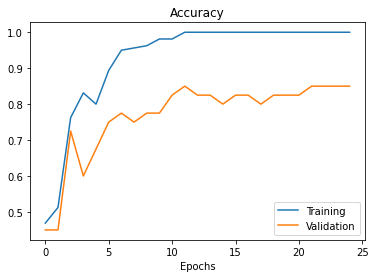

In [153]:
plot_acc_valgraph(cnn,1)


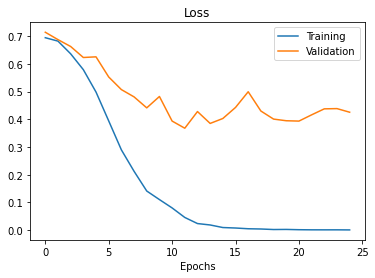

In [154]:
plot_loss_valgraph(cnn,1)

In [116]:
# evaluate the model
score = cnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

Test loss: 69.1912591457367
Test accuracy: 67.5000011920929


In [117]:
y_pred=cnn.predict(x=X_test, verbose=1)

2/2 [==============================] - 0s 8ms/step


In [118]:
y_test

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [119]:
y_pred

array([[0.49804953, 0.50195044],
       [0.4992172 , 0.5007828 ],
       [0.4995844 , 0.50041556],
       [0.4995776 , 0.50042236],
       [0.49778244, 0.50221753],
       [0.49900934, 0.5009906 ],
       [0.4991537 , 0.5008463 ],
       [0.49789703, 0.502103  ],
       [0.49875167, 0.5012483 ],
       [0.49844784, 0.5015522 ],
       [0.4991975 , 0.5008025 ],
       [0.49785683, 0.50214314],
       [0.49880084, 0.5011992 ],
       [0.49963698, 0.50036293],
       [0.4989485 , 0.50105155],
       [0.4997387 , 0.50026125],
       [0.499082  , 0.50091803],
       [0.5000891 , 0.49991092],
       [0.49824062, 0.5017594 ],
       [0.49924177, 0.50075823],
       [0.49989605, 0.5001039 ],
       [0.49857196, 0.501428  ],
       [0.49972796, 0.500272  ],
       [0.49912977, 0.5008702 ],
       [0.49813554, 0.50186443],
       [0.4989801 , 0.50101995],
       [0.5000888 , 0.49991116],
       [0.49921125, 0.50078875],
       [0.49938655, 0.5006135 ],
       [0.49979633, 0.5002036 ],
       [0.

In [ ]:
yy_pred1 = np.argmax(yy_pred, axis=1)

In [ ]:
accuracy = accuracy_score(yy_test, yy_pred1)
print(accuracy*100)

97.5


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    # '.2f' if normalize else 
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[[19  0]
 [ 1 20]]


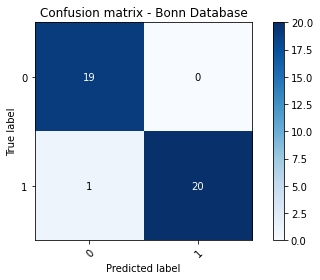

In [ ]:
confusion_mat= plot_confusion_matrix(yy_test, yy_pred1, classes=[0,1], title='Confusion matrix - Bonn Database')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yy_test,yy_pred1,target_names = ['Non-Seizure(0)', 'Seizure(1)']))

                precision    recall  f1-score   support

Non-Seizure(0)       0.95      1.00      0.97        19
    Seizure(1)       1.00      0.95      0.98        21

      accuracy                           0.97        40
     macro avg       0.97      0.98      0.97        40
  weighted avg       0.98      0.97      0.98        40



In [ ]:
#from tensorflow.keras.models import load_model

cnn.save('BONN_CNN_MODEL.h5')  # creates a HDF5 file 'my_model.h5'


# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

In [ ]:
# load generator
from tensorflow.keras.models import load_model
gen = load_model('./GAN_Generator_model2.h5')

OSError: ignored

In [ ]:
# generate 100 synthetic seizure signals
signal_gen = []
for i in range(0,100):
    noise = tf.random.normal([1, 100])
    generated_signal = gen(noise, training=False)
    generated_signal = generated_signal[:,:,0,:]
    signal_gen.append(generated_signal[0])


NameError: ignored

In [ ]:
signal_gen = np.array(signal_gen)

In [ ]:
# obtain 100 real non-seizure signals
#from sklearn.preprocessing import normalize
#path='D:/'
dr='Z'
sfilenames=[]

if dr=='N':
    end='/*.TXT'
else:
    end='/*.txt' 

#end='/*.txt'
sfilenames=glob.glob(path + dr + end)
import numpy as np
import pandas as pd

def generate_datasets(filenames):
    arry=[]    
    for files in filenames:
        df=pd.read_table(files,names="X")
        arry.append(np.array(df,dtype="float32"))
    return np.array(arry) 

In [ ]:
len(sfilenames)

100

In [ ]:
signals = generate_datasets(sfilenames)
### try normalising whole dataset

In [ ]:
X = signals
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=scaler.fit_transform(X2)# normalize(X2,axis=1) 

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(X),4097,1)
X=X4
signals = X

In [ ]:
'''
# Normalising synthetic signals
X = signal_gen
XC=X
X1=X.reshape(len(X)*4097,order='F')
X2=X1.reshape(4097,len(X))

X2=normalize(X2,axis=1)

X3=np.reshape(X2,4097*len(X),order='F')
X4=X3.reshape(len(X),4097,1)
X=X4
signal_gen = X
'''

"\n# Normalising synthetic signals\nX = signal_gen\nXC=X\nX1=X.reshape(len(X)*4097,order='F')\nX2=X1.reshape(4097,len(X))\n\nX2=normalize(X2,axis=1)\n\nX3=np.reshape(X2,4097*len(X),order='F')\nX4=X3.reshape(len(X),4097,1)\nX=X4\nsignal_gen = X\n"

In [ ]:
x_test = np.append(signal_gen,signals, axis=0)  # 1,0
x_test.shape

(200, 4097, 1)

In [ ]:
x_test.shape

(200, 4097, 1)

In [ ]:
y_zero = np.zeros((100,),dtype='int64')
y_ones = np.ones((100,),dtype='int64')
y_test = np.append(y_ones, y_zero, axis=0)
y_test.shape


(200,)

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
# evaluate the model
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

Test loss: 2.4479124695059227
Test accuracy: 100.0


In [ ]:
y_pred2 = cnn.predict(x=x_test, verbose=1)

200/200 [==============================] - 0s 73us/sample


In [ ]:
y_pred3 = np.argmax(y_pred2, axis=1)

In [ ]:
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred3)
print(accuracy*100)

100.0


[[100   0]
 [  0 100]]


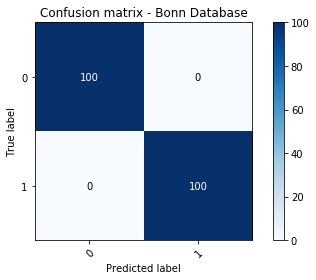

In [ ]:
confusion_mat = plot_confusion_matrix(y_test, y_pred3, classes=[0,1], title='Confusion matrix - Bonn Database')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3,target_names = ['Non-Seizure(0)', 'Seizure(1)']))

                precision    recall  f1-score   support

Non-Seizure(0)       1.00      1.00      1.00       100
    Seizure(1)       1.00      1.00      1.00       100

      accuracy                           1.00       200
     macro avg       1.00      1.00      1.00       200
  weighted avg       1.00      1.00      1.00       200

